In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.models import load_model
import random

In [2]:
dir_path = 'dataset\images'

comofod_data = {'image_id': [],'image_path': [],'label': []}
  
for img in os.listdir(dir_path):
    if 'F' in img:
        temp_path = os.path.join(dir_path, img)
        comofod_data['image_path'].append(temp_path)
        comofod_data['label'].append('fake')
        comofod_data['image_id'].append(img)
    if 'O' in img:
        temp_path = os.path.join(dir_path, img)
        comofod_data['image_path'].append(temp_path)
        comofod_data['label'].append('real')
        comofod_data['image_id'].append(img)
        
label_encoder = LabelEncoder()
comofod_data = pd.DataFrame(comofod_data)
comofod_data['label'] = label_encoder.fit_transform(comofod_data['label'])
comofod_data = comofod_data.sample(frac=1, random_state=random.seed(42)).reset_index(drop=True)
comofod_data.head()

,image_id,image_path,label
0,100_F_CA1.png,dataset\images\100_F_CA1.png,0
1,100_F.png,dataset\images\100_F.png,0
2,118_O_NA1.png,dataset\images\118_O_NA1.png,1
3,130_F_IB1.png,dataset\images\130_F_IB1.png,0
4,162_F_JC6.jpg,dataset\images\162_F_JC6.jpg,0


In [3]:
# Preprocess Image

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gray)

    img_denoised = cv2.fastNlMeansDenoising(img_eq, None, h=10, templateWindowSize=7, searchWindowSize=21)
    img_color_corrected = cv2.cvtColor(img_denoised, cv2.COLOR_GRAY2BGR)
    img_color_corrected = cv2.cvtColor(img_color_corrected, cv2.COLOR_BGR2HSV)
    img_color_corrected[:, :, 1] = img_color_corrected[:, :, 1] * 1.2
    img_color_corrected[:, :, 2] = img_color_corrected[:, :, 2] * 0.8
    img_color_corrected = cv2.cvtColor(img_color_corrected, cv2.COLOR_HSV2BGR)

    return img_color_corrected

In [4]:
# Loading Different Models

model1 = load_model('newVgg16.h5')
model2 = load_model('newMobileNet.h5')
model3 = load_model('NewresNet50.h5')
model4 = load_model('newVanillaModel.h5')
model5 = load_model('newDenseNet.h5')


In [15]:
# Predicting Data

data = comofod_data[145:175]

ypred = [[],[],[],[],[]]
for i in range(145,175):
    img = preprocess_image(data['image_path'][i])
    img = img.reshape((1,256,256,3))
    img1 = img/255
    pred1 = model1.predict(img)
    pred2 = model2.predict(img)
    pred3 = model3.predict(img1)
    pred4 = model4.predict(img1)
    pred5 = model5.predict(img)
    ypred[0].append(np.argmax(pred1, axis=1))
    ypred[1].append(np.argmax(pred2, axis=1))
    ypred[2].append(np.argmax(pred3, axis=1))
    ypred[3].append(np.argmax(pred4, axis=1))
    ypred[4].append(np.argmax(pred5, axis=1))

y_true = data['label'].to_numpy()
for i in range(len(ypred[0])):
    ypred[0][i] = ypred[0][i][0]
    ypred[1][i] = ypred[1][i][0]
    ypred[2][i] = ypred[2][i][0]
    ypred[3][i] = ypred[3][i][0]
    ypred[4][i] = ypred[4][i][0]

arr1 = np.array(ypred[0])
arr2 = np.array(ypred[1])
arr3 = np.array(ypred[2])
arr4 = np.array(ypred[3])
arr5 = np.array(ypred[4])

1/1 [==============================] - 0s 192ms/step


In [6]:
# Comparing Models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy1 = accuracy_score(y_true, arr1)
accuracy2 = accuracy_score(y_true, arr2)
accuracy3 = accuracy_score(y_true, arr3)
accuracy4 = accuracy_score(y_true, arr4)
accuracy5 = accuracy_score(y_true, arr5)
precision1 = precision_score(y_true, arr1)
precision2 = precision_score(y_true, arr2)
precision3 = precision_score(y_true, arr3)
precision4 = precision_score(y_true, arr4)
precision5 = precision_score(y_true, arr5)
recall1 = recall_score(y_true, arr1)
recall2 = recall_score(y_true, arr2)
recall3 = recall_score(y_true, arr3)
recall4 = recall_score(y_true, arr4)
recall5 = recall_score(y_true, arr5)
f11 = f1_score(y_true, arr1)
f12 = f1_score(y_true, arr2)
f13 = f1_score(y_true, arr3)
f14 = f1_score(y_true, arr4)
f15 = f1_score(y_true, arr5)

print(f"Accuracy Vgg16: {accuracy1:.4f}")
print(f"Precision Vgg16: {precision1:.4f}")
print(f"Recall Vgg16: {recall1:.4f}")
print(f"F1 Score Vgg16: {f11:.4f}")
print()
print(f"Accuracy MobileNet: {accuracy2:.4f}")
print(f"Precision MobileNet: {precision2:.4f}")
print(f"Recall MobileNet: {recall2:.4f}")
print(f"F1 Score MobileNet: {f12:.4f}")
print()
print(f"Accuracy ResNet50: {accuracy3:.4f}")
print(f"Precision ResNet50: {precision3:.4f}")
print(f"Recall ResNet50: {recall3:.4f}")
print(f"F1 Score ResNet50: {f13:.4f}")
print()
print(f"Accuracy Vanilla: {accuracy4:.4f}")
print(f"Precision Vanilla: {precision4:.4f}")
print(f"Recall Vanilla: {recall4:.4f}")
print(f"F1 Score Vanilla: {f14:.4f}")
print()
print(f"Accuracy DenseNet121: {accuracy5:.4f}")
print(f"Precision DenseNet121: {precision5:.4f}")
print(f"Recall DenseNet121: {recall5:.4f}")
print(f"F1 Score DenseNet121: {f15:.4f}")
print()


Accuracy Vgg16: 0.5667
Precision Vgg16: 0.5385
Recall Vgg16: 0.5000
F1 Score Vgg16: 0.5185

Accuracy MobileNet: 0.5667
Precision MobileNet: 0.5556
Recall MobileNet: 0.3571
F1 Score MobileNet: 0.4348

Accuracy ResNet50: 0.4667
Precision ResNet50: 0.4667
Recall ResNet50: 1.0000
F1 Score ResNet50: 0.6364

Accuracy Vanilla: 0.5667
Precision Vanilla: 0.5714
Recall Vanilla: 0.2857
F1 Score Vanilla: 0.3810

Accuracy DenseNet121: 0.6000
Precision DenseNet121: 0.5625
Recall DenseNet121: 0.6429
F1 Score DenseNet121: 0.6000



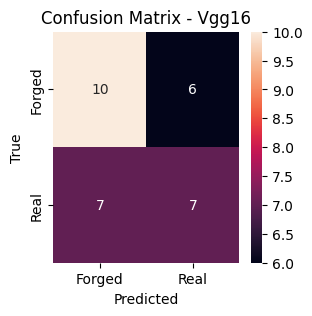

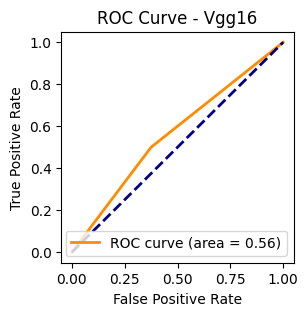

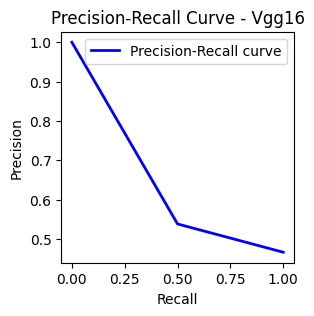

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


cm_vgg16 = confusion_matrix(y_true, arr1)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_vgg16, annot=True, fmt='d', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix - Vgg16')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Vgg16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true, arr1)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)
plt.figure(figsize=(3, 3))
plt.plot(fpr_vgg16, tpr_vgg16, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Vgg16')
plt.legend(loc='lower right')
plt.show()

# # Precision-Recall Curve for Vgg16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_true, arr1)
plt.figure(figsize=(3, 3))
plt.plot(recall_vgg16, precision_vgg16, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Vgg16')
plt.legend(loc='upper right')
plt.show()


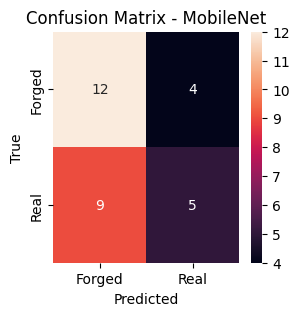

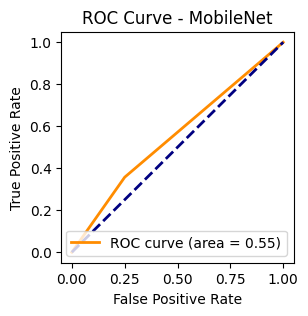

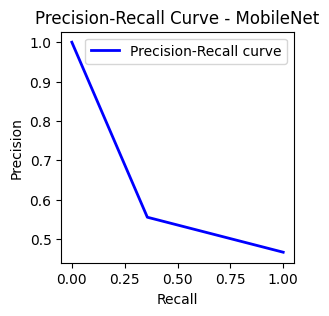

In [20]:
cm_vgg16 = confusion_matrix(y_true, arr2)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_vgg16, annot=True, fmt='d', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix - MobileNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Vgg16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true, arr2)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)
plt.figure(figsize=(3, 3))
plt.plot(fpr_vgg16, tpr_vgg16, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MobileNet')
plt.legend(loc='lower right')
plt.show()

# # Precision-Recall Curve for Vgg16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_true, arr2)
plt.figure(figsize=(3, 3))
plt.plot(recall_vgg16, precision_vgg16, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MobileNet')
plt.legend(loc='upper right')
plt.show()

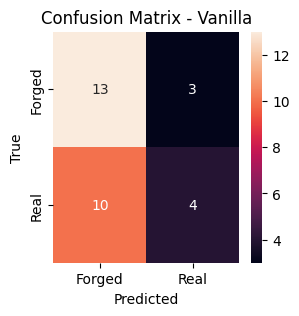

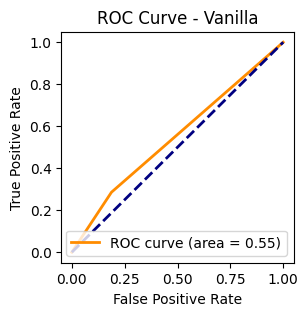

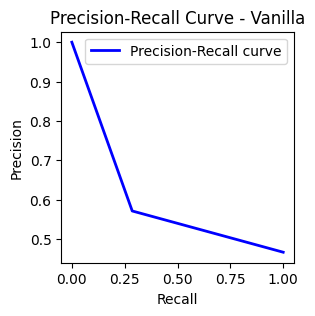

In [21]:
cm_vgg16 = confusion_matrix(y_true, arr4)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_vgg16, annot=True, fmt='d', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix - Vanilla')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Vgg16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true, arr4)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)
plt.figure(figsize=(3, 3))
plt.plot(fpr_vgg16, tpr_vgg16, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Vanilla')
plt.legend(loc='lower right')
plt.show()

# # Precision-Recall Curve for Vgg16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_true, arr4)
plt.figure(figsize=(3, 3))
plt.plot(recall_vgg16, precision_vgg16, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Vanilla')
plt.legend(loc='upper right')
plt.show()

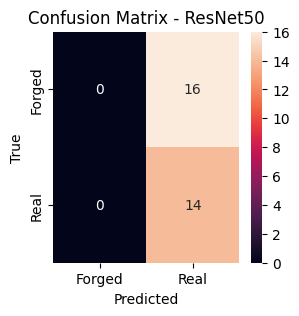

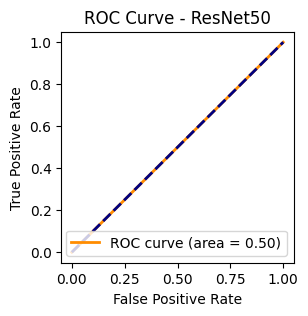

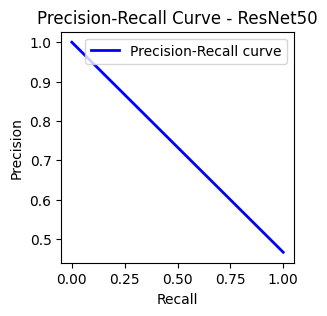

In [22]:
cm_vgg16 = confusion_matrix(y_true, arr3)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_vgg16, annot=True, fmt='d', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix - ResNet50')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Vgg16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true, arr3)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)
plt.figure(figsize=(3, 3))
plt.plot(fpr_vgg16, tpr_vgg16, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ResNet50')
plt.legend(loc='lower right')
plt.show()

# # Precision-Recall Curve for Vgg16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_true, arr3)
plt.figure(figsize=(3, 3))
plt.plot(recall_vgg16, precision_vgg16, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ResNet50')
plt.legend(loc='upper right')
plt.show()

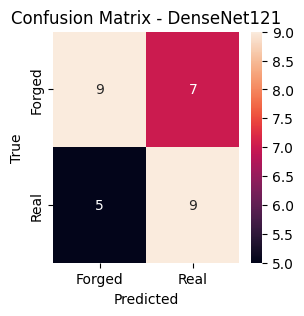

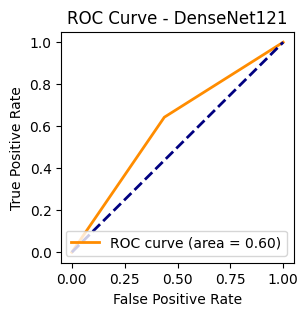

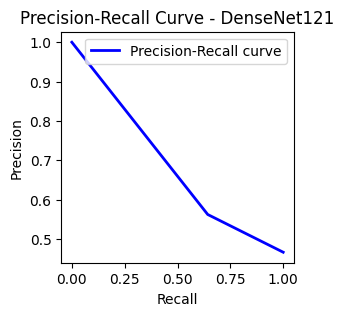

In [23]:
cm_vgg16 = confusion_matrix(y_true, arr5)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_vgg16, annot=True, fmt='d', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix - DenseNet121')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Vgg16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true, arr5)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)
plt.figure(figsize=(3, 3))
plt.plot(fpr_vgg16, tpr_vgg16, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_vgg16:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DenseNet121')
plt.legend(loc='lower right')
plt.show()

# # Precision-Recall Curve for Vgg16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(y_true, arr5)
plt.figure(figsize=(3, 3))
plt.plot(recall_vgg16, precision_vgg16, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - DenseNet121')
plt.legend(loc='upper right')
plt.show()

In [12]:
def convert_labels_to_string(labels):
    return ["Forged" if label == 0 else "Real" for label in labels]

arr1 = convert_labels_to_string(arr1)
arr2 = convert_labels_to_string(arr2)
arr3 = convert_labels_to_string(arr3)
arr4 = convert_labels_to_string(arr4)
arr5 = convert_labels_to_string(arr4)
y_true = convert_labels_to_string(y_true)

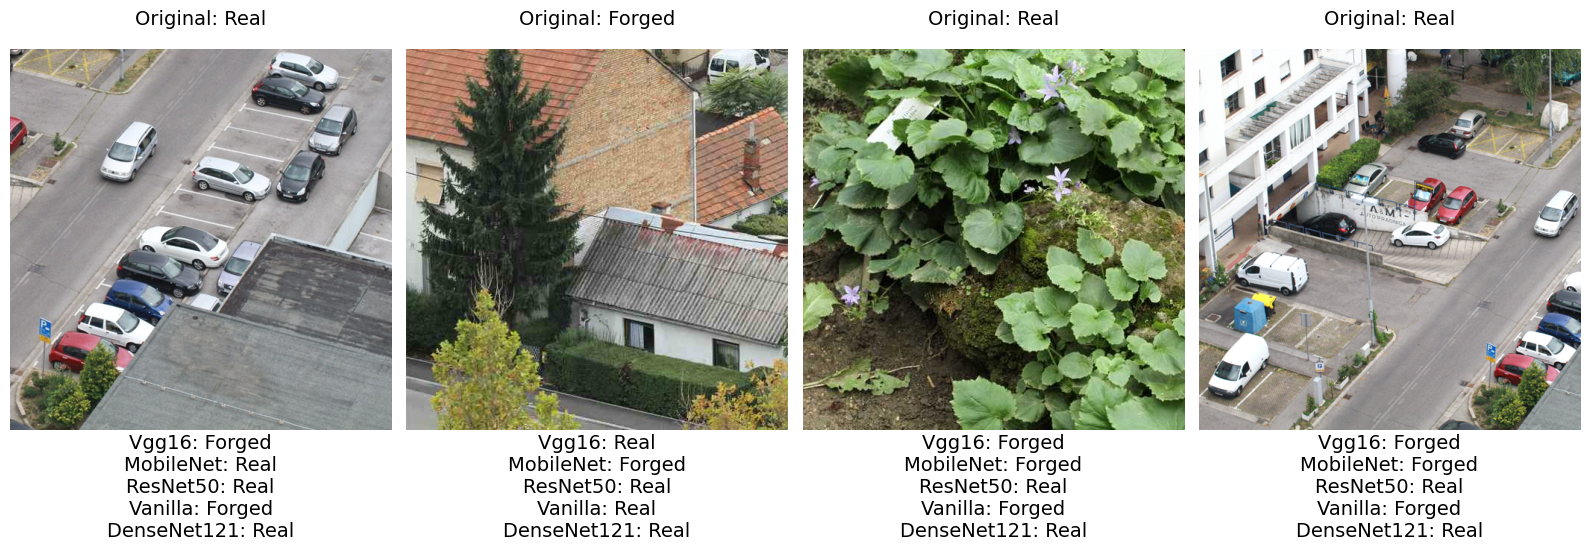

In [13]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(16, 8))

for i in range(4):
    plt.subplot(141 + i)
    img = cv2.imread(data['image_path'][145 + i])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
    plt.text(0.5, 1.02, f'Original: {y_true[i]}\n\n', transform=plt.gca().transAxes,
             ha='center', va='center', color='black', fontsize =14)  
    
    plt.text(0.5, -0.15, f'Vgg16: {arr1[i]}\nMobileNet: {arr2[i]}\n'
                        f'ResNet50: {arr3[i]}\nVanilla: {arr4[i]}\nDenseNet121: {arr5[i]}', transform=plt.gca().transAxes,
             ha='center', va='center', color='black', fontsize = 14) 

    plt.axis('off')

plt.tight_layout()  
plt.show()


In [ ]:
# Prediction Function

def predictForgery(model,img_path):
    img = preprocess_image(img_path)
    img = img.reshape((1,256,256,3))
    prediction = model.predict(img)
    pred = np.argmax(prediction, axis=1)
    pred = pred[0]
    if pred == 0:
        print("Forged Image")
        print(f"{prediction[0][0]*100:.2f} %")
    else:
        print("Image is not Forged")

predictForgery(model1,r"dataset\images\100_F_CA1.png")